In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("h1n1_vaccine_prediction.csv")

# Display the first few rows of the DataFrame
print(df.head())


   unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0  

In [2]:
# Check for missing values
print(df.isnull().sum())


unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [3]:
# Handle missing values as needed
# For example, fill missing values in numeric columns with mean
df.fillna(df.mean(), inplace=True)


C:\Users\Mallampati Bhavishya\AppData\Local\Temp\ipykernel_22068\2242469633.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [4]:
# Prepare the data
X = df.drop(['unique_id', 'h1n1_vaccine'], axis=1)
y = df['h1n1_vaccine']


In [5]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [7]:
# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [8]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
training_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', training_accuracy)


Training Accuracy: 0.9999531944769483


In [9]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', test_accuracy)

# Additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.8508049419692999

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4212
           1       0.75      0.45      0.56      1130

    accuracy                           0.85      5342
   macro avg       0.81      0.70      0.73      5342
weighted avg       0.84      0.85      0.84      5342


Confusion Matrix:
[[4042  170]
 [ 627  503]]


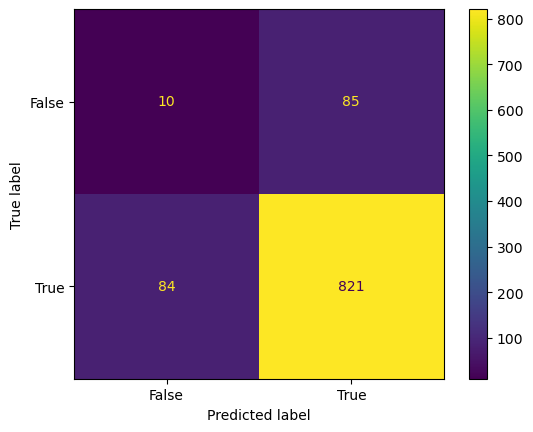

In [10]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()